## Data analysis for the 2nd exps of UIST 2020

In [1]:
library(plyr)
library(ez)
library(nlme)
library(multcomp)
library(nortest) # for Kolmogorov-Smirnov test

library(ggpubr)
library(grid)
library(gridExtra)

source("helper_functions.R")
source("friedman.R")

options(repr.plot.width=8, repr.plot.height=3)

Warning message:
“package ‘plyr’ was built under R version 3.6.3”

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


Warning message:
“package ‘multcomp’ was built under R version 3.6.2”

Loading required package: mvtnorm


Warning message:
“package ‘mvtnorm’ was built under R version 3.6.3”

Loading required package: survival


Warning message:
“package ‘survival’ was built under R version 3.6.3”

Loading required package: TH.data


Loading required package: MASS


Warning message:
“package ‘MASS’ was built under R version 3.6.2”


Attaching package: ‘TH.data’



The following object is masked from ‘package:MASS’:

    geyser



Loading required package: ggplot2


Warning message:
“package ‘ggplot2’ was built under R version 3.6.3”

Loading required package: magrittr



Attaching package: ‘ggpubr’



The following object is masked from ‘package:plyr’:

    mutate



In [2]:
# read the data
mydata <- read.csv("Data_exp2.csv")

# create a table with aggregated data
mydata_agg = aggregate(mydata,
                by = list(mydata$roomT, mydata$condition, mydata$id),
                FUN = mean)
mydata_agg[1:3] <- list(NULL)

# create a table with aggregated data by condition
mydata_agg2 = aggregate(mydata,
                by = list(mydata$condition, mydata$id),
                FUN = mean)
mydata_agg2[1:2] <- list(NULL)
mydata_agg2[3] <- list(NULL)

# define factors in both tables
mydata_agg$id <- as.factor(mydata_agg$id)
mydata_agg$condition <- as.factor(mydata_agg$condition)
mydata_agg$roomT <- as.factor(mydata_agg$roomT)

mydata_agg2$id <- as.factor(mydata_agg2$id)
mydata_agg2$condition <- as.factor(mydata_agg2$condition)

In [3]:
str(mydata)

'data.frame':	288 obs. of  8 variables:
 $ id              : int  5 5 5 5 5 5 5 5 4 4 ...
 $ condition       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ roomT           : int  0 0 0 0 1 1 1 1 1 1 ...
 $ TCT             : num  38720 35336 41049 35164 32416 ...
 $ nb_warning      : int  1 10 0 2 1 2 2 0 1 3 ...
 $ nb_teleportation: int  2 2 2 2 2 3 2 3 3 5 ...
 $ walking         : num  18.05 26.26 19.54 14.86 8.51 ...
 $ rot             : num  2357 2343 2099 2205 1946 ...


In [4]:
mydata

id condition roomT TCT      nb_warning nb_teleportation walking   rot     
1    5 1         0     38720.40  1         2                18.053516 2357.405
2    5 1         0     35336.50 10         2                26.258503 2342.783
3    5 1         0     41048.80  0         2                19.541346 2098.688
4    5 1         0     35163.90  2         2                14.855635 2205.154
5    5 1         1     32416.10  1         2                 8.507107 1945.900
6    5 1         1     40522.80  2         3                16.272792 2168.623
7    5 1         1     26542.60  2         2                11.148528 1536.806
8    5 1         1     26192.00  0         3                 9.082843 1598.858
9    4 1         1     68208.80  1         3                17.738478 2672.311
10   4 1         1     69732.90  3         5                13.789949 3196.760
11   4 1         1     56536.60  1         3                10.931371 2823.500
12   4 1         1     73586.70  0         2                19.431371 3185.885
13   4 1         0     63970.70  0         2                14.465685 2945.481
14   4 1         0     59666.90  0         2                15.807107 3044.853
15   4 1         0     51514.00  0         2                14.231371 2823.172
16   4 1         0     47306.30  0         2                14.407107 3003.752
17  10 1         1     46917.21  5         3                18.141421 3495.263
18  10 1         1     41088.74  3         3                 8.741421 2572.541
19  10 1         1     64338.20  6         3                19.646409 4425.411
20  10 1         1     72352.70  3         4                 9.300000 3926.031
21  10 1         0     40199.60  0         2                15.507107 2788.152
22  10 1         0     36393.50  0         2                15.489949 2912.591
23  10 1         0     48988.80  1         3                25.253516 3888.270
24  10 1         0     42860.40  2         2                18.424264 2842.535
25  11 1         0     40363.60  0         2                 8.607107 2517.102
26  11 1         0     44046.00  1         2                17.946409 3038.700
27  11 1         0     48992.10  2         3                14.387830 3233.194
28  11 1         0     47661.80  2         4                11.200000 3836.931
29  11 1         1     29974.60  1         3                11.614214 1999.891
30  11 1         1     39130.50  4         4                20.729252 2489.141
⋮   ⋮  ⋮         ⋮     ⋮        ⋮          ⋮                ⋮         ⋮       
259 12 2         1     47680.70 5           4               12.500000 2871.045
260 12 2         1     65155.40 6           9               24.146409 3716.151
261 12 2         0     32288.70 0           2               14.224264 2844.952
262 12 2         0     33183.50 1           2               14.841421 3118.915
263 12 2         0     35767.60 0           5               12.541421 3115.688
264 12 2         0     32021.00 0           1               16.665685 2682.944
265 12 0         1     50377.25 8          10               16.400000 3752.762
266 12 0         1     33341.40 0          12                5.624264 2016.682
267 12 0         1     46099.70 0          16                5.700000 3305.460
268 12 0         1     52379.70 1          20               10.600000 3836.793
269 12 0         0     54310.60 2          25               10.804988 3910.421
270 12 0         0     45140.50 0          18                0.600000 2458.490
271 12 0         0     39996.40 2          18                7.200000 3195.020
272 12 0         0     42758.70 0          22                2.600000 2626.792
273  6 2         1     44479.50 2           4               13.697056 2504.266
274  6 2         1     40755.30 0           3                9.165685 2681.818
275  6 2         1     48659.60 1           4               12.389949 2714.556
276  6 2         1     96968.70 7           8               29.214214 4490.550
277  6 2         0     27823.80 0           2         

In [5]:
str(mydata_agg)

'data.frame':	72 obs. of  8 variables:
 $ id              : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ condition       : Factor w/ 3 levels "0","1","2": 1 1 2 2 3 3 1 1 2 2 ...
 $ roomT           : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 1 2 1 2 ...
 $ TCT             : num  91027 72210 64363 49418 48000 ...
 $ nb_warning      : num  0.5 0.5 1.75 0.5 0 1 1.25 2.75 0 0.25 ...
 $ nb_teleportation: num  20.75 17.5 3.75 6.5 2.25 ...
 $ walking         : num  12.43 2.77 17.31 13.44 16.39 ...
 $ rot             : num  3977 3353 3177 2649 2829 ...


In [6]:
mydata_agg

id condition roomT TCT       nb_warning nb_teleportation walking   rot     
1  1  0         0      91026.90  0.50      20.75            12.428553 3976.551
2  1  0         1      72210.35  0.50      17.50             2.775000 3353.244
3  1  1         0      64363.20  1.75       3.75            17.312626 3176.875
4  1  1         1      49417.97  0.50       6.50            13.437132 2648.587
5  1  2         0      47999.68  0.00       2.25            16.391421 2828.762
6  1  2         1      57217.53  1.00       3.75            14.913909 2675.791
7  2  0         0      49140.82  1.25       8.75            10.295711 3255.006
8  2  0         1      46286.98  2.75       4.25            12.618198 2877.558
9  2  1         0      47531.88  0.00       2.00            16.381371 3609.013
10 2  1         1      36768.80  0.25       3.25            11.452817 2590.377
11 2  2         0      48631.72  0.50       2.00            17.019975 3509.636
12 2  2         1      52066.17  1.75       2.00            14.940156 3465.148
13 3  0         0     100249.88 11.00      17.00            23.514949 4034.780
14 3  0         1     100699.85 13.00      19.75            25.970692 4468.133
15 3  1         0      52723.98  3.00       3.50            13.321751 3067.825
16 3  1         1      66203.57  0.50       3.50            18.563890 3237.610
17 3  2         0      44027.12  0.00       2.00            15.085660 2908.693
18 3  2         1      90433.20  2.25       7.00            17.227288 3555.901
19 4  0         0      59059.66  2.25      15.50            13.419239 3203.429
20 4  0         1      49154.65  2.25       7.25            15.761396 2787.480
21 4  1         0      55614.47  0.00       2.00            14.727817 2954.315
22 4  1         1      67016.25  1.25       3.25            15.472792 2969.614
23 4  2         0      32721.67  0.00       2.00            11.189949 2467.701
24 4  2         1      39601.29  0.50       3.50             9.746751 2610.342
25 5  0         0      54493.20  2.75      15.25            15.664626 3046.190
26 5  0         1      43751.05  0.50      10.50            12.988360 2219.907
27 5  1         0      37567.40  3.25       2.00            19.677250 2251.007
28 5  1         1      31418.38  1.25       2.50            11.252817 1812.547
29 5  2         0      38818.68  0.00       2.00            19.123303 2497.154
30 5  2         1      42480.62  0.50       5.25            13.878858 2326.611
⋮  ⋮  ⋮         ⋮     ⋮         ⋮          ⋮                ⋮         ⋮       
43 8  0         0     46442.88  0.75       13.00             8.243198 2452.472
44 8  0         1     57172.06  0.50       16.75             9.187132 2970.854
45 8  1         0     27381.75  0.75        2.00             8.388909 1884.119
46 8  1         1     40762.34  0.00        2.00            11.282107 2504.863
47 8  2         0     42099.53  0.75        3.75             9.563379 2604.148
48 8  2         1     27889.95  0.00        2.00             9.891421 2424.443
49 9  0         0     61957.10  6.25        7.75            21.809601 3026.097
50 9  0         1     73624.80  6.25        7.00            29.799226 3897.741
51 9  1         0     58756.97  4.50        4.25            18.463379 3369.174
52 9  1         1     53765.68  3.50        2.75            17.941421 3050.110
53 9  2         0     56886.62  1.50        4.50            15.981371 3334.880
54 9  2         1     45912.35  0.25        2.00            17.611171 2799.615
55 10 0         0     60538.12  5.75       11.00            22.617462 3334.183
56 10 0         1     49447.10  6.25        9.00            17.142462 2668.410
57 10 1         0     42110.57  0.75        2.25            18.668709 3107.887
58 10 1         1     56174.21  4.25        3.25            13.957313 3604.811
59 10 2         0     31998.00  0.00        2.50            14.423139 2677.414
60 10 2         1     46380.20  1.75        4.00            14.397998 2772.867
61 11 0         0     55684.18  3.00       20.75     

# Analize of NB_Warnings

#### Descriptive stats and plots of the aggregated data

  condition roomT  N nb_warning nb_warning_norm       sd        se        ci
1         0     0 12  3.2916667       3.2916667 1.951285 0.5632874 1.2397873
2         0     1 12  3.4583333       3.4583333 2.616225 0.7552391 1.6622701
3         1     0 12  1.3541667       1.3541667 1.451140 0.4189081 0.9220105
4         1     1 12  1.6458333       1.6458333 1.565893 0.4520343 0.9949208
5         2     0 12  0.3333333       0.3333333 1.505776 0.4346801 0.9567244
6         2     1 12  1.4583333       1.4583333 1.854135 0.5352426 1.1780610


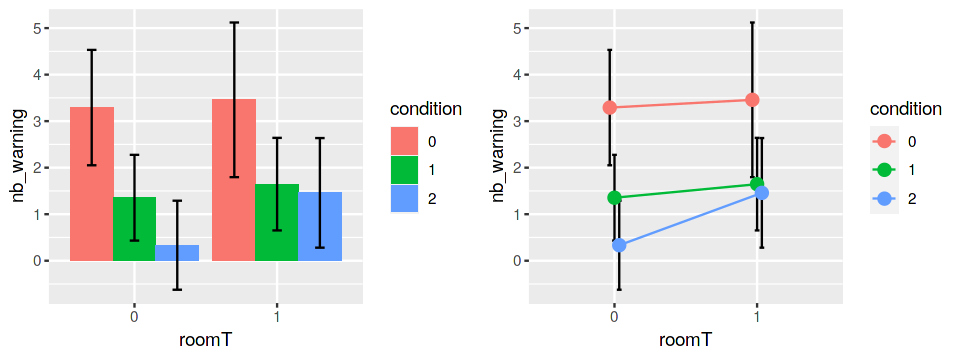

In [18]:
summary_agg <- summarySEwithin(mydata_agg, measurevar="nb_warning", withinvars=c("condition", "roomT"), idvar="id")
print(summary_agg)

ggplot(summary_agg, aes(x=roomT, y=nb_warning, fill=condition)) +
geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=nb_warning-ci, ymax=nb_warning+ci),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9)) -> p1

# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right
ggplot(summary_agg, aes(x=roomT, y=nb_warning, colour=condition, group=condition)) + 
    geom_errorbar(aes(ymin=nb_warning-ci, ymax=nb_warning+ci), colour="black", width=.1, position=pd) +
    geom_line(position=pd) +
    geom_point(position=pd, size=3) -> p2

grid.arrange(p1, p2, ncol = 2)

#### Checking the normal distribution


	Shapiro-Wilk normality test

data:  mydata_agg$nb_warning
W = 0.73616, p-value = 4.643e-10


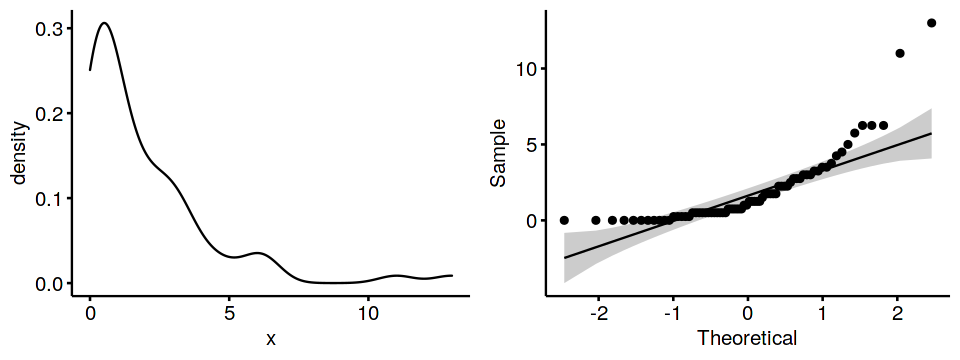

In [8]:
ggdensity(mydata_agg$nb_warning) -> p1
ggqqplot(mydata_agg$nb_warning) -> p2
grid.arrange(p1, p2, ncol = 2)

shapiro.test(mydata_agg$nb_warning)

Shapriro test is significant : the data is different from the normal distriubtion => it is not normally distributed

#### Do an log transform and check the lognormal distribution


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  mydata_agg$nb_warning_log
D = 0.13807, p-value = 0.001655


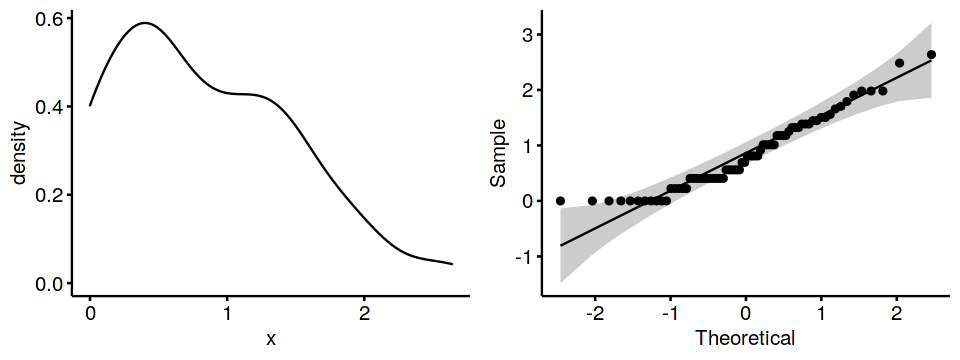

In [9]:
mydata_agg$nb_warning_log <- log(mydata_agg$nb_warning+1)

ggdensity(mydata_agg$nb_warning_log) -> p1
ggqqplot(mydata_agg$nb_warning_log) -> p2
grid.arrange(p1, p2, ncol = 2)

lillie.test(mydata_agg$nb_warning_log)

Kolmogorov-Smirnov test is significant : the data is different from the log normal distriubtion => it is not log normally distributed

We will analyze the nb-warning with non-parametrics tests

#### Running a Friedman test on data aggregated by condition

  condition  N nb_warning nb_warning_norm       sd        se        ci
1         0 12  3.3750000       3.3750000 2.469399 0.7128541 1.5689814
2         1 12  1.5000000       1.5000000 1.255072 0.3623080 0.7974346
3         2 12  0.8958333       0.8958333 1.638830 0.4730895 1.0412629


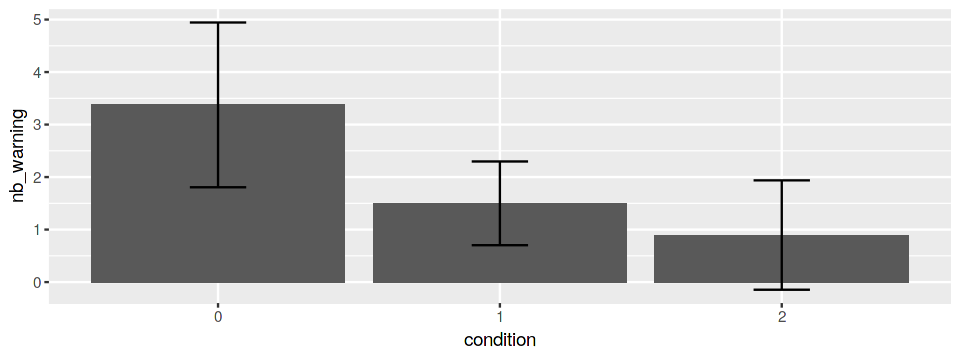

In [10]:
summary_agg2 <- summarySEwithin(mydata_agg2, measurevar="nb_warning", withinvars=c("condition"), idvar="id")
print(summary_agg2)

ggplot(summary_agg2, aes(x=condition, y=nb_warning)) +
geom_bar(stat="identity", position=position_dodge()) +
geom_errorbar(aes(ymin=nb_warning-ci, ymax=nb_warning+ci),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9))

In [11]:
friedman.test(nb_warning ~ condition | id, data=mydata_agg2 )


	Friedman rank sum test

data:  nb_warning and condition and id
Friedman chi-squared = 11.511, df = 2, p-value = 0.003165


In [12]:
wilcox.test(subset(mydata_agg2, condition == "0")$nb_warning, subset(mydata_agg2, condition == "1")$nb_warning, paired = TRUE)
wilcox.test(subset(mydata_agg2, condition == "0")$nb_warning, subset(mydata_agg2, condition == "2")$nb_warning, paired = TRUE)
wilcox.test(subset(mydata_agg2, condition == "1")$nb_warning, subset(mydata_agg2, condition == "2")$nb_warning, paired = TRUE)

Warning message in wilcox.test.default(subset(mydata_agg2, condition == "0")$nb_warning, :
“cannot compute exact p-value with ties”


	Wilcoxon signed rank test with continuity correction

data:  subset(mydata_agg2, condition == "0")$nb_warning and subset(mydata_agg2, condition == "1")$nb_warning
V = 69, p-value = 0.02061
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(subset(mydata_agg2, condition == "0")$nb_warning, :
“cannot compute exact p-value with ties”

Warning message in wilcox.test.default(subset(mydata_agg2, condition == "0")$nb_warning, :
“cannot compute exact p-value with zeroes”


	Wilcoxon signed rank test with continuity correction

data:  subset(mydata_agg2, condition == "0")$nb_warning and subset(mydata_agg2, condition == "2")$nb_warning
V = 62, p-value = 0.01124
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(subset(mydata_agg2, condition == "1")$nb_warning, :
“cannot compute exact p-value with ties”

Warning message in wilcox.test.default(subset(mydata_agg2, condition == "1")$nb_warning, :
“cannot compute exact p-value with zeroes”


	Wilcoxon signed rank test with continuity correction

data:  subset(mydata_agg2, condition == "1")$nb_warning and subset(mydata_agg2, condition == "2")$nb_warning
V = 43, p-value = 0.126
alternative hypothesis: true location shift is not equal to 0


Loading required package: coin


Loading required package: colorspace


$Friedman.Test

	Asymptotic General Symmetry Test

data:  nb_warning by condition (0, 1, 2) 
	 stratified by id
maxT = 3.3731, p-value = 0.002054
alternative hypothesis: two.sided


$PostHoc.Test
                 
1 - 0 0.111565614
2 - 0 0.002071026
2 - 1 0.356552673


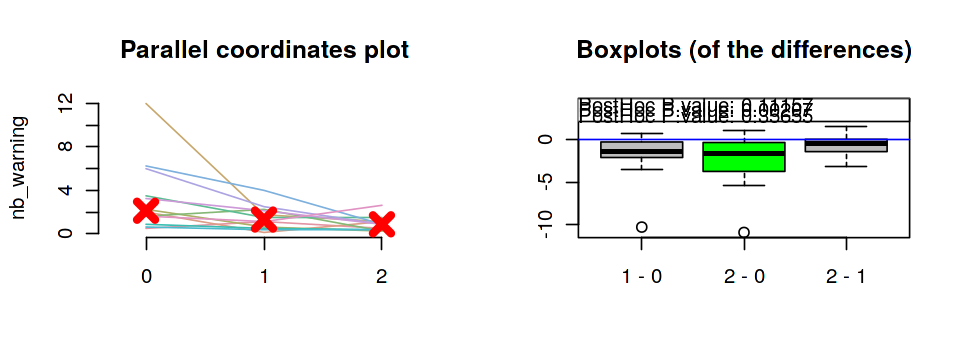

In [13]:
# with post-hoc tests
friedman.test.with.post.hoc(nb_warning ~ condition | id, data=mydata_agg2)

#### Running a Friedman test for each roomT

In [14]:
roomT0 <- subset(mydata_agg, roomT == "0")
roomT1 <- subset(mydata_agg, roomT == "1")

friedman.test(nb_warning ~ condition | id, data=roomT0 )
friedman.test(nb_warning ~ condition | id, data=roomT1 )


	Friedman rank sum test

data:  nb_warning and condition and id
Friedman chi-squared = 14.279, df = 2, p-value = 0.0007931



	Friedman rank sum test

data:  nb_warning and condition and id
Friedman chi-squared = 4.9545, df = 2, p-value = 0.08397


In [15]:
wilcox.test(subset(roomT0, condition == "0")$nb_warning, subset(roomT0, condition == "1")$nb_warning, paired = TRUE)
wilcox.test(subset(roomT0, condition == "0")$nb_warning, subset(roomT0, condition == "2")$nb_warning, paired = TRUE)
wilcox.test(subset(roomT0, condition == "1")$nb_warning, subset(roomT0, condition == "2")$nb_warning, paired = TRUE)

Warning message in wilcox.test.default(subset(roomT0, condition == "0")$nb_warning, :
“cannot compute exact p-value with ties”

Warning message in wilcox.test.default(subset(roomT0, condition == "0")$nb_warning, :
“cannot compute exact p-value with zeroes”


	Wilcoxon signed rank test with continuity correction

data:  subset(roomT0, condition == "0")$nb_warning and subset(roomT0, condition == "1")$nb_warning
V = 61, p-value = 0.01434
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(subset(roomT0, condition == "0")$nb_warning, :
“cannot compute exact p-value with ties”

Warning message in wilcox.test.default(subset(roomT0, condition == "0")$nb_warning, :
“cannot compute exact p-value with zeroes”


	Wilcoxon signed rank test with continuity correction

data:  subset(roomT0, condition == "0")$nb_warning and subset(roomT0, condition == "2")$nb_warning
V = 66, p-value = 0.003822
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(subset(roomT0, condition == "1")$nb_warning, :
“cannot compute exact p-value with ties”

Warning message in wilcox.test.default(subset(roomT0, condition == "1")$nb_warning, :
“cannot compute exact p-value with zeroes”


	Wilcoxon signed rank test with continuity correction

data:  subset(roomT0, condition == "1")$nb_warning and subset(roomT0, condition == "2")$nb_warning
V = 49, p-value = 0.03164
alternative hypothesis: true location shift is not equal to 0


### Wrong test !!! => according to the graph, this is not possible !

$Friedman.Test

	Asymptotic General Symmetry Test

data:  nb_warning by condition (0, 1, 2) 
	 stratified by id
maxT = 3.7741, p-value = 0.0004342
alternative hypothesis: two.sided


$PostHoc.Test
                  
1 - 0 0.1007462865
2 - 0 0.0004310106
2 - 1 0.1957002848


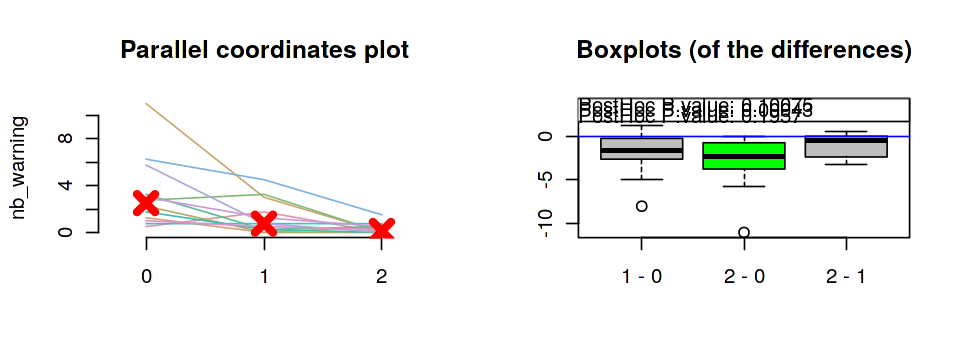

In [16]:
# with post-hoc tests
friedman.test.with.post.hoc(nb_warning ~ condition | id, data=roomT0)

In [17]:
friedman.test.with.post.hoc(nb_warning ~ condition | id, data=roomT1)

[1] "The results where not significant, There is no need for a post hoc test"



	Asymptotic General Symmetry Test

data:  nb_warning by condition (0, 1, 2) 
	 stratified by id
maxT = 2.0254, p-value = 0.1061
alternative hypothesis: two.sided
